In [17]:
words = open('names.txt', 'r').read().splitlines()

In [18]:
words[:10]

['bao',
 'florencia',
 'sophia',
 'pablo',
 'mariana',
 'shun',
 'thabo',
 'jacob',
 'mila',
 'pablo']

In [19]:
len(words)

32000

In [20]:
min(len(w) for w in words)

2

In [21]:
max(len(w) for w in words)

9

In [22]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [23]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', '<E>'), 9502),
 (('a', 'n'), 5454),
 (('<S>', 'a'), 4600),
 (('i', '<E>'), 4084),
 (('n', '<E>'), 3849),
 (('n', 'a'), 3083),
 (('i', 'a'), 2894),
 (('r', 'i'), 2882),
 (('o', '<E>'), 2876),
 (('h', 'a'), 2860),
 (('<S>', 's'), 2843),
 (('<S>', 'm'), 2779),
 (('a', 'r'), 2777),
 (('i', 'n'), 2627),
 (('m', 'a'), 2345),
 (('m', 'i'), 2276),
 (('r', 'a'), 2211),
 (('s', '<E>'), 2140),
 (('a', 'm'), 2034),
 (('e', 'n'), 1998),
 (('l', 'a'), 1978),
 (('<S>', 'l'), 1866),
 (('<S>', 'n'), 1780),
 (('e', 'l'), 1765),
 (('<S>', 'k'), 1701),
 (('<S>', 't'), 1692),
 (('<S>', 'r'), 1643),
 (('<S>', 'j'), 1565),
 (('l', 'e'), 1546),
 (('t', 'a'), 1529),
 (('a', 's'), 1492),
 (('l', 'i'), 1484),
 (('a', 'i'), 1412),
 (('t', 'o'), 1339),
 (('o', 'r'), 1326),
 (('h', 'i'), 1326),
 (('t', 'i'), 1319),
 (('n', 'i'), 1319),
 (('a', 'b'), 1317),
 (('y', 'a'), 1314),
 (('<S>', 'h'), 1309),
 (('i', 'l'), 1296),
 (('j', 'a'), 1265),
 (('l', '<E>'), 1243),
 (('<S>', 'e'), 1217),
 (('r', '<E>'), 1196)

In [24]:
import torch

In [25]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [26]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [27]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [28]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


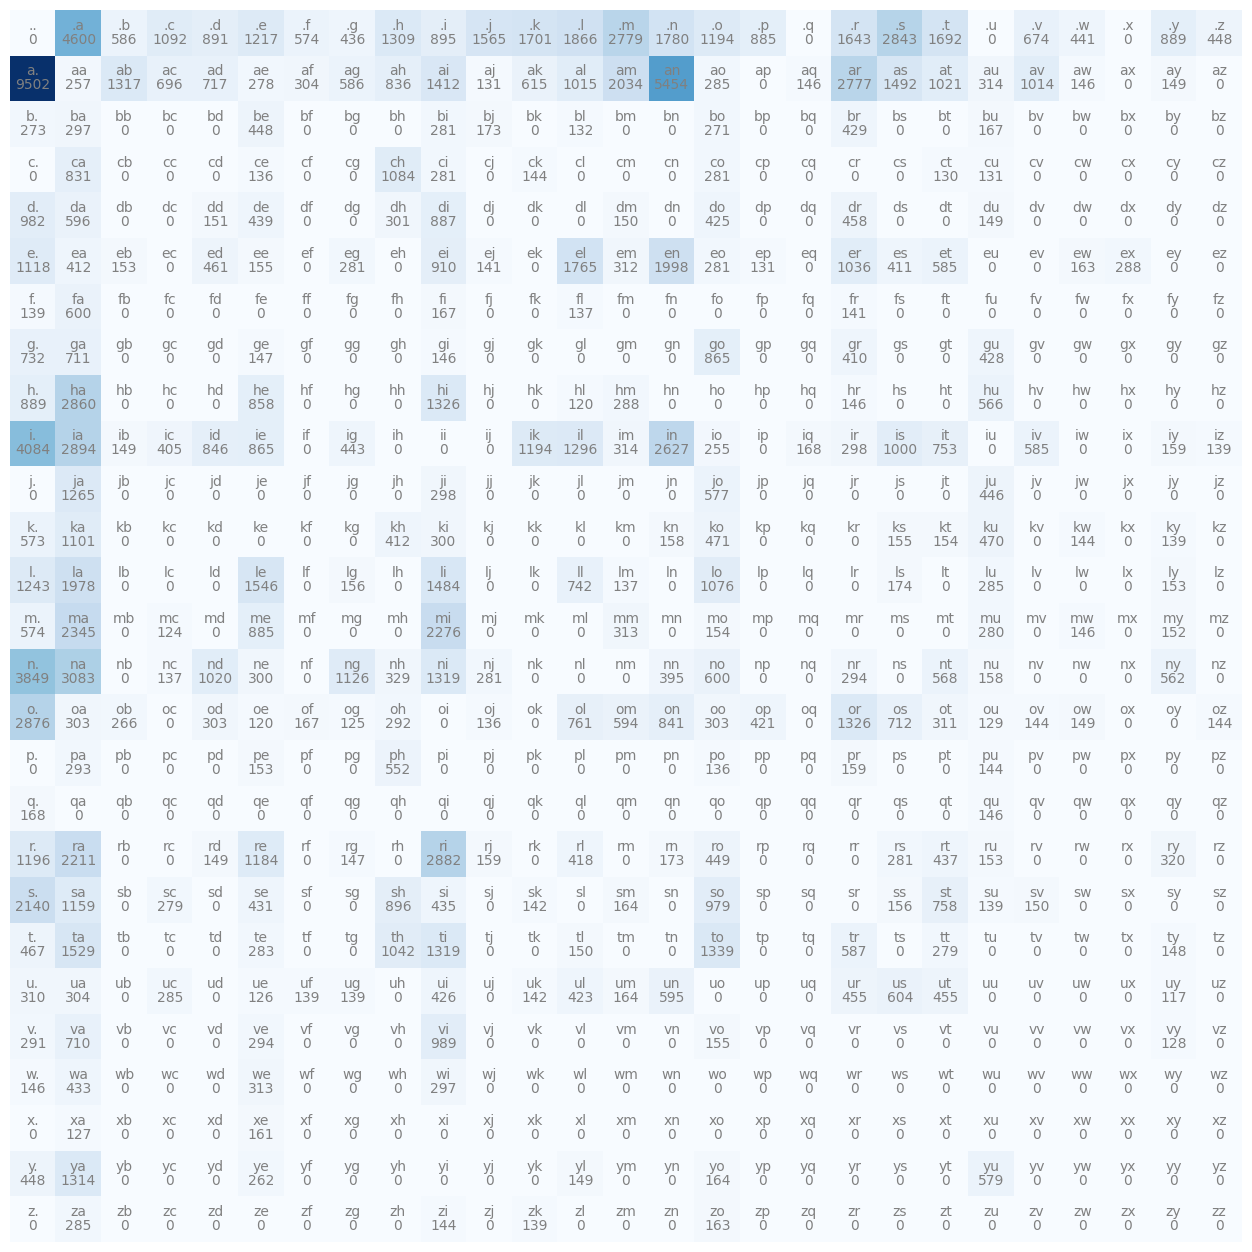

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [30]:
N[0]

tensor([   0, 4600,  586, 1092,  891, 1217,  574,  436, 1309,  895, 1565, 1701,
        1866, 2779, 1780, 1194,  885,    0, 1643, 2843, 1692,    0,  674,  441,
           0,  889,  448], dtype=torch.int32)

In [31]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1437, 0.0183, 0.0341, 0.0278, 0.0380, 0.0179, 0.0136, 0.0409,
        0.0280, 0.0489, 0.0532, 0.0583, 0.0868, 0.0556, 0.0373, 0.0277, 0.0000,
        0.0513, 0.0888, 0.0529, 0.0000, 0.0211, 0.0138, 0.0000, 0.0278, 0.0140])

In [32]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

't'

In [33]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [34]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [37]:
p.shape

torch.Size([3])

In [40]:
P = N.float()

In [41]:
P.shape

torch.Size([27, 27])

In [42]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [ ]:
# 27, 27
# 27,  1

In [43]:
P.sum(1).shape

torch.Size([27])

In [44]:
P

tensor([[   0., 4600.,  586., 1092.,  891., 1217.,  574.,  436., 1309.,  895.,
         1565., 1701., 1866., 2779., 1780., 1194.,  885.,    0., 1643., 2843.,
         1692.,    0.,  674.,  441.,    0.,  889.,  448.],
        [9502.,  257., 1317.,  696.,  717.,  278.,  304.,  586.,  836., 1412.,
          131.,  615., 1015., 2034., 5454.,  285.,    0.,  146., 2777., 1492.,
         1021.,  314., 1014.,  146.,    0.,  149.,    0.],
        [ 273.,  297.,    0.,    0.,    0.,  448.,    0.,    0.,    0.,  281.,
          173.,    0.,  132.,    0.,    0.,  271.,    0.,    0.,  429.,    0.,
            0.,  167.,    0.,    0.,    0.,    0.,    0.],
        [   0.,  831.,    0.,    0.,    0.,  136.,    0.,    0., 1084.,  281.,
            0.,  144.,    0.,    0.,    0.,  281.,    0.,    0.,    0.,    0.,
          130.,  131.,    0.,    0.,    0.,    0.,    0.],
        [ 982.,  596.,    0.,    0.,  151.,  439.,    0.,    0.,  301.,  887.,
            0.,    0.,    0.,  150.,    0.,  425.,   

In [ ]:
# 27, 27
#  1, 27

In [45]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [46]:
P

tensor([[3.1224e-05, 1.4366e-01, 1.8328e-02, 3.4127e-02, 2.7851e-02, 3.8030e-02,
         1.7954e-02, 1.3645e-02, 4.0903e-02, 2.7976e-02, 4.8896e-02, 5.3143e-02,
         5.8295e-02, 8.6802e-02, 5.5609e-02, 3.7312e-02, 2.7664e-02, 3.1224e-05,
         5.1332e-02, 8.8800e-02, 5.2862e-02, 3.1224e-05, 2.1076e-02, 1.3801e-02,
         3.1224e-05, 2.7789e-02, 1.4019e-02],
        [2.9218e-01, 7.9324e-03, 4.0523e-02, 2.1430e-02, 2.2075e-02, 8.5780e-03,
         9.3774e-03, 1.8048e-02, 2.5734e-02, 4.3444e-02, 4.0584e-03, 1.8939e-02,
         3.1238e-02, 6.2567e-02, 1.6772e-01, 8.7932e-03, 3.0746e-05, 4.5196e-03,
         8.5411e-02, 4.5903e-02, 3.1422e-02, 9.6849e-03, 3.1207e-02, 4.5196e-03,
         3.0746e-05, 4.6118e-03, 3.0746e-05],
        [1.0969e-01, 1.1930e-01, 4.0032e-04, 4.0032e-04, 4.0032e-04, 1.7974e-01,
         4.0032e-04, 4.0032e-04, 4.0032e-04, 1.1289e-01, 6.9656e-02, 4.0032e-04,
         5.3243e-02, 4.0032e-04, 4.0032e-04, 1.0889e-01, 4.0032e-04, 4.0032e-04,
         1.7214e-

In [60]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

texel.
lomasuraila.
ktaha.
vinimittainrlguak.
ka.
a.
kstaivabelaberigotos.
mili.
llavo.
kwitedo.
ka.
eria.
sade.
eniavi.
nyuf.
butidinivendorllas.
kusor.
bin.
si.
peng.


In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [48]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-467307.5000)
nll=tensor(467307.5000)
2.3149850368499756


In [61]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. b
b a
a o
o .


In [62]:
xs

tensor([ 0,  2,  1, 15])

In [63]:
ys

tensor([ 2,  1, 15,  0])

In [64]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [65]:
xenc.shape

torch.Size([4, 27])

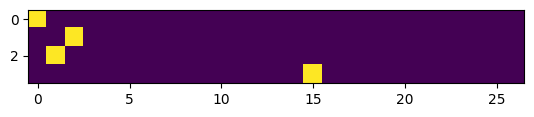

In [66]:
plt.imshow(xenc)

In [67]:
xenc.dtype

torch.float32

In [68]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.6626, -0.6182, -0.4984,  1.0636, -0.8179, -1.4575, -0.9600, -1.1356,
          0.5060, -0.1265,  2.0740, -0.6052, -1.0214,  0.1761,  0.6440,  0.1672,
          0.7240,  0.2594, -1.3763,  0.7741,  0.7687, -0.9908, -0.8133, -1.2586,
          2.1187, -0.6662,  1.3191],
        [-1.0460, -1.4907,  0.2484, -1.1862,  0.2582, -0.6157, -2.0085, -0.9915,
          0.2001, -0.9622, -0.0429, -1.0694,  0.5034, -1.8876, -1.4449, -0.3254,
          1.1594,  0.1403,  0.7289, -1.0703,  0.6594,  0.0127,  1.2207,  0.2081,
         -0.4405, -1.5344, -1.4783],
        [-0.5463,  0.8460,  0.5621, -1.2054,  0.0858, -0.7927, -0.3851, -0.7771,
          0.8075, -1.5303,  0.2556,  0.3396, -0.9140, -1.0550,  0.7181, -0.7128,
         -1.8111,  0.3773,  0.4088,  2.2817,  0.3536,  0.5356, -0.1848, -1.5283,
          0.8843,  1.1653,  0.0563],
        [ 1.3194,  0.1004,  1.4359, -1.0214, -0.8843, -0.2343,  1.0477,  1.0278,
         -0.2841, -0.1532,  0.3418,  1.2151, -0.0309,  0.0810, -0.9727,  0.9253

In [69]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0434, 0.0121, 0.0136, 0.0649, 0.0099, 0.0052, 0.0086, 0.0072, 0.0371,
         0.0197, 0.1782, 0.0122, 0.0081, 0.0267, 0.0426, 0.0265, 0.0462, 0.0290,
         0.0057, 0.0486, 0.0483, 0.0083, 0.0099, 0.0064, 0.1863, 0.0115, 0.0838],
        [0.0137, 0.0088, 0.0501, 0.0119, 0.0506, 0.0211, 0.0052, 0.0145, 0.0477,
         0.0149, 0.0375, 0.0134, 0.0647, 0.0059, 0.0092, 0.0282, 0.1246, 0.0450,
         0.0810, 0.0134, 0.0756, 0.0396, 0.1325, 0.0481, 0.0252, 0.0084, 0.0089],
        [0.0145, 0.0584, 0.0440, 0.0075, 0.0273, 0.0114, 0.0171, 0.0115, 0.0562,
         0.0054, 0.0324, 0.0352, 0.0101, 0.0087, 0.0514, 0.0123, 0.0041, 0.0366,
         0.0377, 0.2456, 0.0357, 0.0428, 0.0208, 0.0054, 0.0607, 0.0804, 0.0265],
        [0.0875, 0.0259, 0.0984, 0.0084, 0.0097, 0.0185, 0.0667, 0.0654, 0.0176,
         0.0201, 0.0329, 0.0789, 0.0227, 0.0254, 0.0088, 0.0590, 0.0120, 0.0468,
         0.0064, 0.0144, 0.0388, 0.0263, 0.0187, 0.1192, 0.0383, 0.0249, 0.0082]])

In [70]:
probs[0]

tensor([0.0434, 0.0121, 0.0136, 0.0649, 0.0099, 0.0052, 0.0086, 0.0072, 0.0371,
        0.0197, 0.1782, 0.0122, 0.0081, 0.0267, 0.0426, 0.0265, 0.0462, 0.0290,
        0.0057, 0.0486, 0.0483, 0.0083, 0.0099, 0.0064, 0.1863, 0.0115, 0.0838])

In [71]:
probs[0].shape

torch.Size([27])

In [72]:
probs[0].sum()

tensor(1.0000)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [73]:
xs

tensor([ 0,  2,  1, 15])

In [78]:
ys

tensor([ 2,  1, 15,  0])

In [79]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [80]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [81]:
probs.shape

torch.Size([4, 27])

In [82]:

nlls = torch.zeros(4)
for i in range(4):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .b (indexes 0,2)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 2
probability assigned by the net to the the correct character: 0.01231403835117817
log likelihood: -4.397015571594238
negative log likelihood: 4.397015571594238
--------
bigram example 2: ba (indexes 2,1)
input to the neural net: 2
output probabilities from the neural net: tensor([0.0249, 0.0079, 0.0314, 0.0344, 0.0086, 0.0098, 0.0246, 0.0174, 0.0076,
        0.0046, 0.0548, 0.0089, 0.1230, 0.1814, 0.0091, 0.0369, 0.0398, 0.0977,
        0.0075, 0.0110, 0.0104, 0.1236, 0.0256, 0.0579, 0.0115, 0.0232, 0.0067])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.00

In [ ]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
print(loss.item())

3.6891887187957764


In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(1):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

2.481828451156616


In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
